#Assignment 1 Part 2
JoshaLynn Worth

02.25.2026


#Analysis and Preprocessing

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df = pd.read_csv('StudentsPerformance.csv')

print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [169]:
df.shape

(1000, 8)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [171]:
#checking number of missing vlaues
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [172]:
#Okay I notice here that fir race/ethnicity it has group a it woudl be better for
#memory to just store A,B,C, and D
df["race/ethnicity"] = df["race/ethnicity"].map({
    "group A": "A",
    "group B": "B",
    "group C": "C",
    "group D": "D"
})

print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female              B           bachelor's degree      standard   
1  female              C                some college      standard   
2  female              B             master's degree      standard   
3    male              A          associate's degree  free/reduced   
4    male              C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [173]:
col = "math score"

def count_outliers(group):
    Q1, Q3 = group[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((group[col] < lower) | (group[col] > upper)).sum()

outliers_by_gender = df.groupby("gender").apply(count_outliers)

outliers_by_gender

/tmp/ipython-input-931/853887297.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_by_gender = df.groupby("gender").apply(count_outliers)


,0
gender,
female,6
male,2


In [174]:
col = "reading score"

def count_outliers(group):
    Q1, Q3 = group[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((group[col] < lower) | (group[col] > upper)).sum()

outliers_by_gender = df.groupby("gender").apply(count_outliers)

outliers_by_gender

/tmp/ipython-input-931/3140029670.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_by_gender = df.groupby("gender").apply(count_outliers)


,0
gender,
female,5
male,3


#A) Gender boxplot (math vs reading)

Question: Are there gender differences in math vs reading?


<Figure size 2400x1800 with 0 Axes>

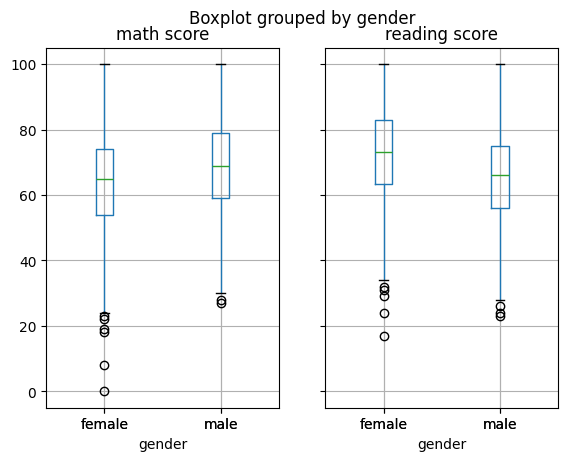

In [175]:
#requried
plt.figure(figsize=(8,6), dpi=300)

df.boxplot(column=['math score', 'reading score'], by='gender')
plt.show()

#B) Test prep impact on math

Question: Do students who completed test prep score higher in math?

<Figure size 2400x1800 with 0 Axes>

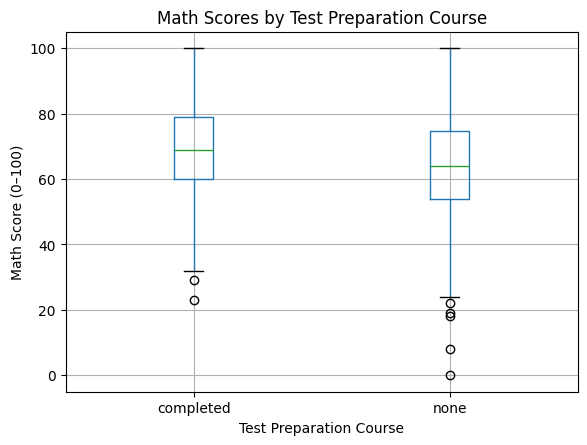

In [176]:
plt.figure(figsize=(8,6), dpi=300)

df.boxplot(column='math score', by='test preparation course')

plt.title("Math Scores by Test Preparation Course")
#take out the genrated heading
plt.suptitle("")
plt.xlabel("Test Preparation Course")
plt.ylabel("Math Score (0–100)")

plt.show()

#C) Lunch type and average performance

Question: Does lunch type (standard vs free/reduced) relate to outcomes?

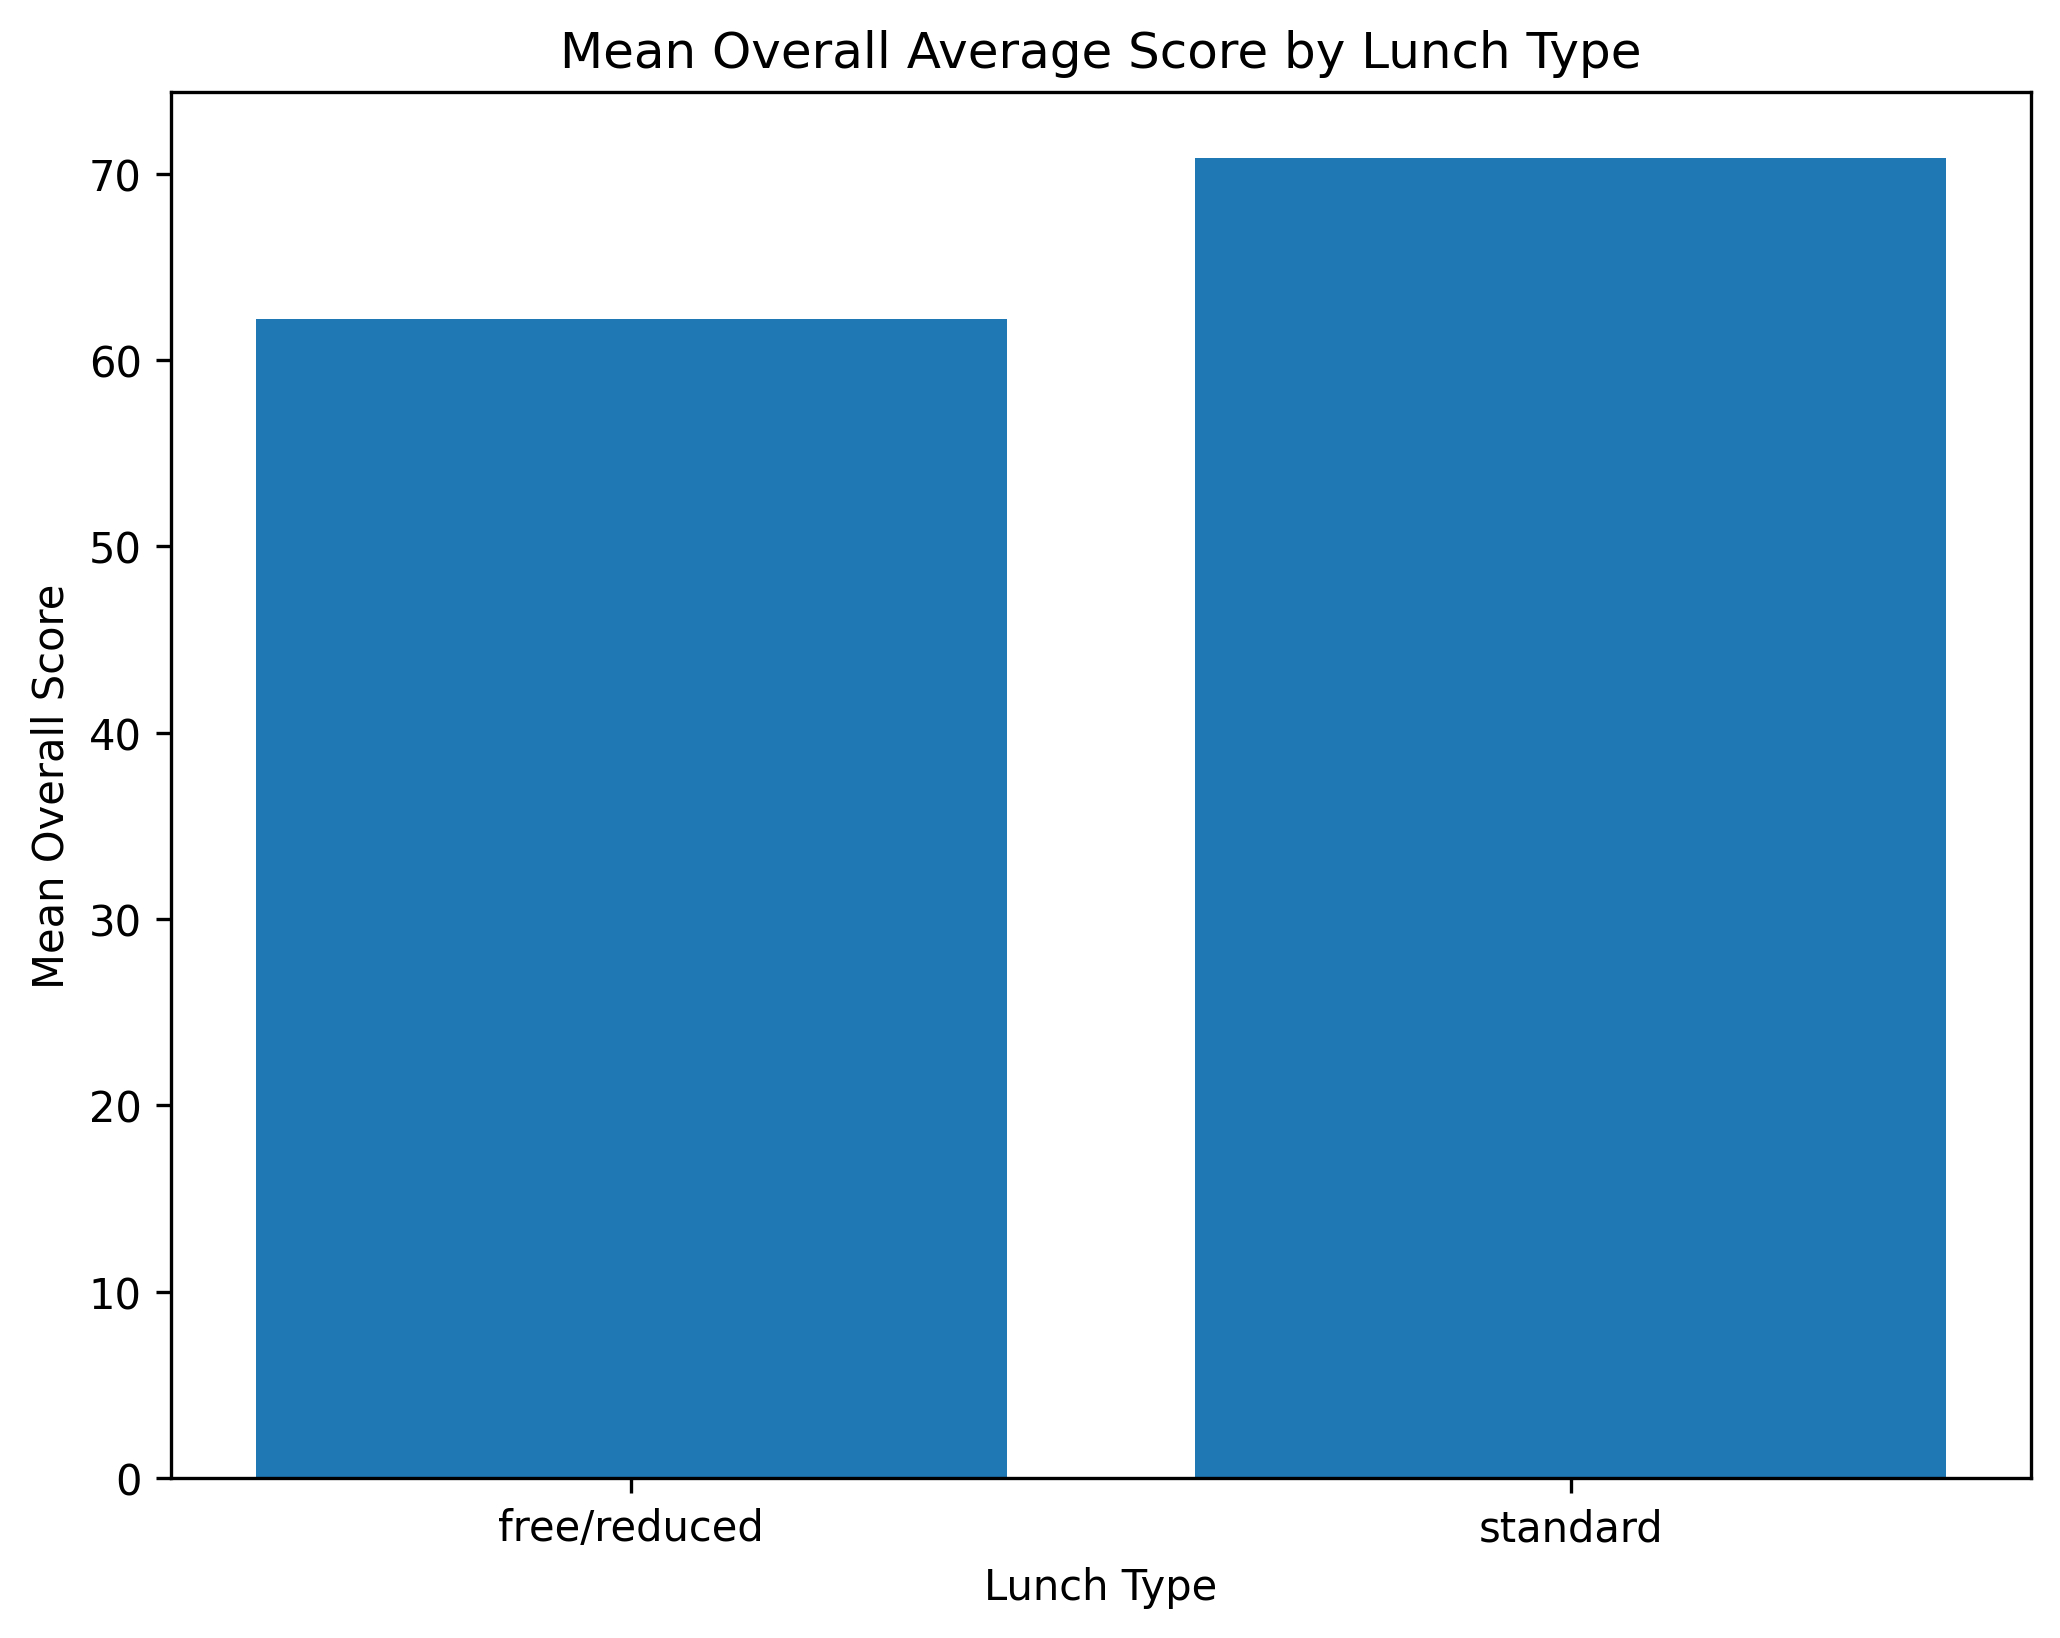

In [177]:
#Chart: Grouped bar chart of mean overall_avg of all the scores (math, reading,
#writing) by lunch
df['overall_avg'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

#use groupby as we just talked about in class
lunch_means = df.groupby('lunch')['overall_avg'].mean()

plt.figure(figsize=(8,6), dpi=300)

#.index() is for labels and .values is for the numeric vlaues foudn bu the mean.
plt.bar(lunch_means.index, lunch_means.values)

plt.title('Mean Overall Average Score by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Mean Overall Score')

plt.show()

#D) Subject correlations

Question: How strongly do the three subjects move together?

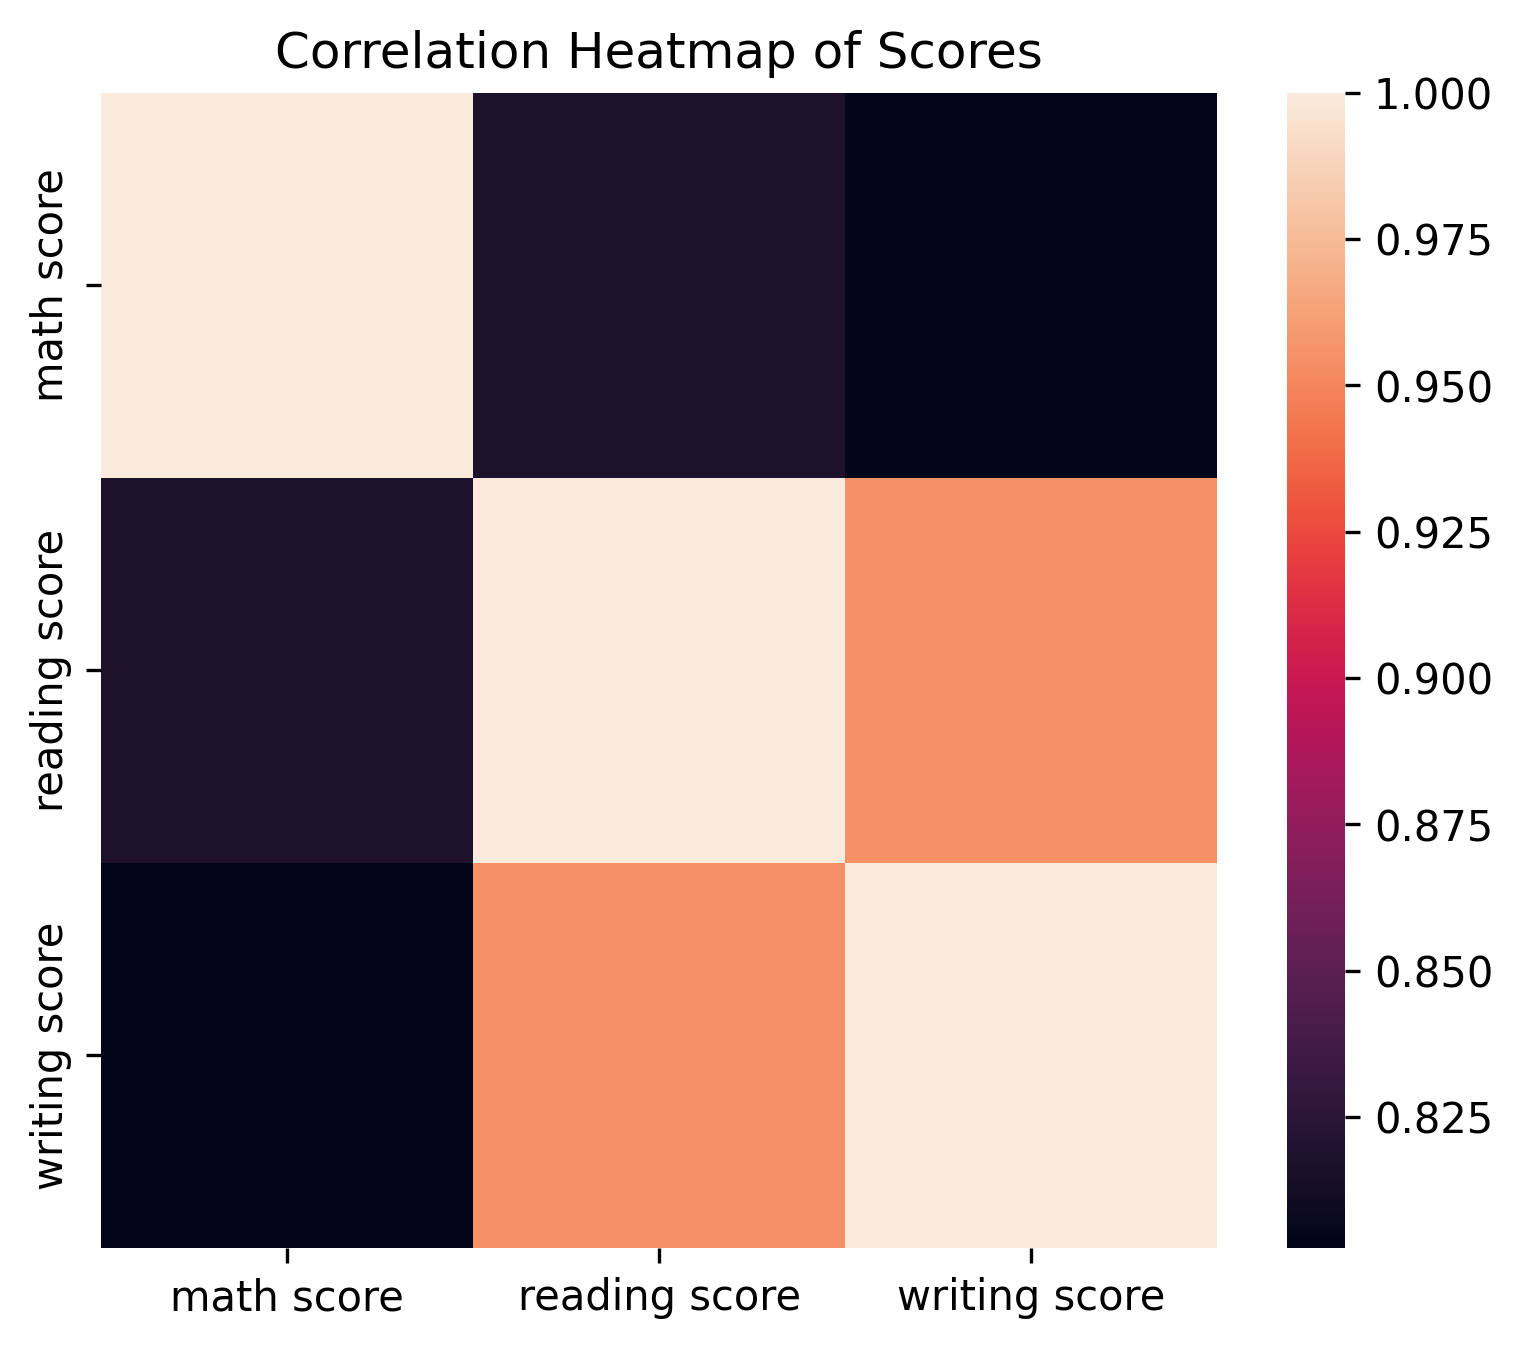

In [178]:
data = df[['math score', 'reading score', 'writing score']]

#We need a corolation matrix
corr_matrix = data.corr()


plt.figure(figsize=(6,5), dpi=300)

sns.heatmap(corr_matrix)
plt.title('Correlation Heatmap of Scores')
plt.show()

#E) Math vs reading with trend lines by test prep

a. Question: How strongly are math and reading scores associated, and do students who
completed the test‑preparation course have a different slope in the math–reading
relationship than those who did not?

b. Chart: Scatter plot with two straight best‑fit lines (one for each group: completed,
none).
i. X‑axis: reading score
ii. Y‑axis: math score

c. Color: Points colored by test preparation course (legend must show the two
groups and each group’s n).

Correlation (math vs reading): 0.82


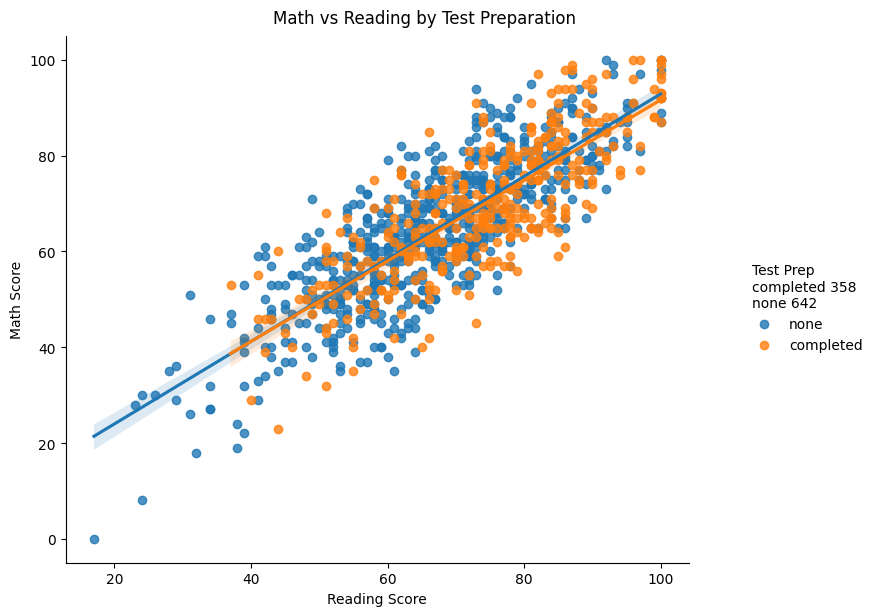

In [179]:
# The Correlation
corr = df['math score'].corr(df['reading score'])
print("Correlation (math vs reading):", round(corr, 2))

# then Count group sizes
counts = df['test preparation course'].value_counts()

# Ploting it
g = sns.lmplot(
    data=df,
    x='reading score',
    y='math score',
    hue='test preparation course',
    height=6,
    aspect=1.2
)

g.set_axis_labels("Reading Score", "Math Score")
g.fig.suptitle("Math vs Reading by Test Preparation", y=1.02)

# Add counts to legend title instead of labels because the other way i was doig it was creatig redudant labels that effect space
g._legend.set_title(
    f"Test Prep\ncompleted {counts['completed']} \nnone {counts['none']}"
)

plt.show()

In [180]:
print(df.head(10))


   gender race/ethnicity parental level of education         lunch  \
0  female              B           bachelor's degree      standard   
1  female              C                some college      standard   
2  female              B             master's degree      standard   
3    male              A          associate's degree  free/reduced   
4    male              C                some college      standard   
5  female              B          associate's degree      standard   
6  female              B                some college      standard   
7    male              B                some college  free/reduced   
8    male              D                 high school  free/reduced   
9  female              B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2               